# EDA (Solo Display + Numeric Fix) — `data/input/<CSV_NAME>`

In [15]:
# === SOLO DISPLAY ===
SAVE = False  # <- NO se guarda nada en disco
print("SAVE =", SAVE)

SAVE = False


In [16]:
# === Parámetros de ruta (funciona si el notebook está en /notebooks o en la raíz) ===
from pathlib import Path

ROOT = Path.cwd().parent if Path.cwd().name.lower() == "notebooks" else Path.cwd()

# >>> Cambia este nombre si usas otro archivo
CSV_NAME = "NEW_FILE.csv"   # o "OLD_FILE.csv"

FILE_PATH = ROOT / "data" / "input" / CSV_NAME
print("Leyendo:", FILE_PATH)
assert FILE_PATH.exists(), f"No existe el archivo: {FILE_PATH}" 

Leyendo: c:\Users\Carlo\Downloads\ETL_P2\data\input\NEW_FILE.csv


In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv(FILE_PATH)
print("shape:", df.shape)
df.head(3)

shape: (134261, 16)


,NOMBRE DEL PUNTO DE MONITOREO,LATITUD,LONGITUD,ELEVACIÓN (m.s.n.m.),CORRIENTE,ZONA HIDROGRÁFICA - ZH,SZH - Código (#Área#Zona##Subzona),Nombre Subzona Hidrográfica,DEPARTAMENTO,MUNICIPIO,FECHA,PROPIEDAD OBSERVADA,RESULTADO,UNIDAD DEL RESULTADO,PROYECTO,CODIGO__MUESTRA
0,ARMA_CAL_AGUADAS_DESEMBOCADURA RIO ARMA,5.7375,-75.5975,612,ARMA,Cauca,"2,618",Río Arma,CALDAS,AGUADAS,2007 Mar 09 12:00:00 AM,ALUMINIO POTENCIALMENTE BIODISPONIBLE,5339,mg Al/kg,Ideam,"14,615"
1,ARMA_CAL_AGUADAS_DESEMBOCADURA RIO ARMA,5.7375,-75.5975,612,ARMA,Cauca,"2,618",Río Arma,CALDAS,AGUADAS,2013 Nov 09 12:00:00 AM,ALUMINIO POTENCIALMENTE BIODISPONIBLE,12560,mg Al/Kg,Ideam,"22,820"
2,ARMA_CAL_AGUADAS_DESEMBOCADURA RIO ARMA,5.7375,-75.5975,612,ARMA,Cauca,"2,618",Río Arma,CALDAS,AGUADAS,2016 Nov 07 12:00:00 AM,ALUMINIO POTENCIALMENTE BIODISPONIBLE,4408,mg Al/Kg,Ideam,"25,379"


In [18]:
from IPython.display import display

_ = df.info()
display(df.dtypes.value_counts())

try:
    desc = df.describe(include='all').T
except Exception:
    num_desc = df.select_dtypes(include=[np.number]).describe().T
    obj_desc = df.select_dtypes(exclude=[np.number]).describe(include='all').T
    desc = pd.concat([num_desc, obj_desc], axis=0, sort=False)

display(desc.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134261 entries, 0 to 134260
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   NOMBRE DEL PUNTO DE MONITOREO       134261 non-null  object 
 1   LATITUD                             134261 non-null  float64
 2   LONGITUD                            134261 non-null  float64
 3   ELEVACIÓN (m.s.n.m.)                134261 non-null  object 
 4   CORRIENTE                           134261 non-null  object 
 5   ZONA HIDROGRÁFICA - ZH              134261 non-null  object 
 6   SZH - Código (#Área#Zona##Subzona)  134261 non-null  object 
 7   Nombre Subzona Hidrográfica         134261 non-null  object 
 8   DEPARTAMENTO                        134261 non-null  object 
 9   MUNICIPIO                           134261 non-null  object 
 10  FECHA                               134261 non-null  object 
 11  PROPIEDAD OBSERVADA       

object     14
float64     2
Name: count, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NOMBRE DEL PUNTO DE MONITOREO,134261,243,RCA_PAEZ_HUI_TESALIA_PAICOL [21057060],1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATITUD,134261.0,NaN,NaN,NaN,4.732771,2.611981,-4.222528,2.728417,4.598969,6.276083,11.510972
LONGITUD,134261.0,NaN,NaN,NaN,-74.633687,1.720899,-78.670278,-75.633056,-74.788806,-73.769333,-67.479583
ELEVACIÓN (m.s.n.m.),134261,216,"2,500",3091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CORRIENTE,134261,120,MAGDALENA,20481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZONA HIDROGRÁFICA - ZH,134261,26,Alto Magdalena,50254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SZH - Código (#Área#Zona##Subzona),134261,103,"2,120",10875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nombre Subzona Hidrográfica,134261,107,Río Bogotá,10875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPARTAMENTO,134261,28,HUILA,27049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,134261,170,PASTO,3529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
nulls_df = pd.DataFrame({
    "nulos": df.isna().sum().sort_values(ascending=False),
    "porcentaje": (df.isna().mean()*100).sort_values(ascending=False),
})
nulls_df.head(30)

,nulos,porcentaje
NOMBRE DEL PUNTO DE MONITOREO,0,0.0
LATITUD,0,0.0
LONGITUD,0,0.0
ELEVACIÓN (m.s.n.m.),0,0.0
CORRIENTE,0,0.0
ZONA HIDROGRÁFICA - ZH,0,0.0
SZH - Código (#Área#Zona##Subzona),0,0.0
Nombre Subzona Hidrográfica,0,0.0
DEPARTAMENTO,0,0.0
MUNICIPIO,0,0.0


In [20]:
dup_count = int(df.duplicated().sum())
print("Duplicados exactos:", dup_count)
if dup_count > 0:
    display(df[df.duplicated()].head(20))

Duplicados exactos: 45


,NOMBRE DEL PUNTO DE MONITOREO,LATITUD,LONGITUD,ELEVACIÓN (m.s.n.m.),CORRIENTE,ZONA HIDROGRÁFICA - ZH,SZH - Código (#Área#Zona##Subzona),Nombre Subzona Hidrográfica,DEPARTAMENTO,MUNICIPIO,FECHA,PROPIEDAD OBSERVADA,RESULTADO,UNIDAD DEL RESULTADO,PROYECTO,CODIGO__MUESTRA
7290,GUAITARA/QDA.DE EL MORRO_NAR_IPIALES_PTE.RUMIC...,0.813786,-77.661978,"2,582",GUAITARA/QDA.DE EL MORRO,Patía,"5,205",Río Guáitara,NARIÑO,IPIALES,2019 Jul 11 12:00:00 AM,MERCURIO TOTAL EN AGUA,<0.005,mg Hg/L,Convenio Binacional ECU-COL,"27,541"
42241,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,ALDRIN EN AGUA,<10,µg ALDRIN/L,Ideam,"28,531"
42245,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,ATRAZINA EN AGUA,<30,µg ATRAZINA/L,Ideam,"28,531"
42250,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,CLOROTALONIL EN AGUA,<10,µg CLOROTALONIL/L,Ideam,"28,531"
42252,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,CLORPIRIFOS EN AGUA,<10,µg CLORPIRIFOS/L,Ideam,"28,531"
42262,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,DIELDRIN ENA AGUA,<10,µg DIELDRIN/L,Ideam,"28,531"
42264,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,ENDOSULFAN SULFATO EN AGUA,<10,µg ENDOSULFAN SULFATO/L,Ideam,"28,531"
42266,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,ENDRIN CETONA EN AGUA,<10,µg ENDRIN CETONA/L,Ideam,"28,531"
42271,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,ɣ-HEXACLOROCICLOHEXANO (ɣ-HCH) EN AGUA,<10,µg (ɣ-HCH)/L,Ideam,"28,531"
42273,RCA_CALOSTROS_CUN_LA CALERA_CALOSTROS BAJO [35...,4.664500,-73.863083,"2,943",CALOSTROS,Meta,"3,502",Río Guayuriba,CUNDINAMARCA,LA CALERA,2021 Oct 12 12:00:00 AM,HEPTACLORO EN AGUA,<10,µg HEPTACLORO/L,Ideam,"28,531"


In [21]:
# === Conversión de columnas "numéricas en texto" a float ===
import re

def parse_number_like(x: str):
    if pd.isna(x): return np.nan
    s = str(x).strip()
    if s == "": return np.nan
    perc = False
    if s.endswith("%"):
        perc = True
        s = s[:-1]
    s = re.sub(r"[^0-9,\.\-]", "", s)
    if "," in s and "." in s:
        last_comma = s.rfind(","); last_dot = s.rfind(".")
        if last_comma > last_dot:
            s = s.replace(".", ""); s = s.replace(",", ".")
        else:
            s = s.replace(",", "")
    elif "," in s and "." not in s:
        s = s.replace(",", ".")
    try:
        val = float(s)
        return val/100.0 if perc else val
    except Exception:
        return np.nan

def coerce_numeric_columns(df, min_ratio: float = 0.7):
    df2 = df.copy()
    converted = []
    diag = []
    obj_cols = df2.select_dtypes(exclude=[np.number]).columns.tolist()
    for col in obj_cols:
        s = df2[col].dropna().astype(str)
        if s.empty: 
            continue
        parsed = s.map(parse_number_like)
        ratio = 1.0 - (parsed.isna().sum() / len(parsed))
        diag.append({"columna": col, "ratio_parseable": float(ratio)})
        if ratio >= min_ratio:
            df2[col] = df2[col].map(parse_number_like)
            converted.append(col)
    return df2, converted, pd.DataFrame(diag).sort_values("ratio_parseable", ascending=False)

df_conv, converted_cols, conv_diag = coerce_numeric_columns(df, min_ratio=0.7)
print("Columnas convertidas a numéricas:", converted_cols)
display(conv_diag.head(20))

num_cols = df_conv.select_dtypes(include=[np.number]).columns.tolist()
print("Numéricas detectadas:", num_cols)

Columnas convertidas a numéricas: ['NOMBRE DEL PUNTO DE MONITOREO', 'ELEVACIÓN (m.s.n.m.)', 'SZH - Código (#Área#Zona##Subzona)', 'FECHA', 'RESULTADO', 'CODIGO__MUESTRA']


,columna,ratio_parseable
1,ELEVACIÓN (m.s.n.m.),1.000000
4,SZH - Código (#Área#Zona##Subzona),1.000000
8,FECHA,1.000000
10,RESULTADO,1.000000
13,CODIGO__MUESTRA,1.000000
0,NOMBRE DEL PUNTO DE MONITOREO,0.828908
11,UNIDAD DEL RESULTADO,0.124720
9,PROPIEDAD OBSERVADA,0.010882
2,CORRIENTE,0.000000
3,ZONA HIDROGRÁFICA - ZH,0.000000


Numéricas detectadas: ['NOMBRE DEL PUNTO DE MONITOREO', 'LATITUD', 'LONGITUD', 'ELEVACIÓN (m.s.n.m.)', 'SZH - Código (#Área#Zona##Subzona)', 'FECHA', 'RESULTADO', 'CODIGO__MUESTRA']


In [22]:
def outliers_iqr(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return (s < lo) | (s > hi), lo, hi

def zmask(s: pd.Series):
    m, sd = s.mean(), s.std(ddof=0)
    if not np.isfinite(sd) or sd == 0:
        return pd.Series(False, index=s.index)
    return ((s - m).abs() / sd) > 3

rows = []
for col in num_cols:
    s = pd.to_numeric(df_conv[col], errors='coerce').dropna()
    if s.empty:
        continue
    m_iqr, lo, hi = outliers_iqr(s)
    m_z = zmask(s)
    rows.append({
        "columna": col,
        "outliers_IQR": int(m_iqr.sum()),
        "umbral_bajo": float(lo),
        "umbral_alto": float(hi),
        "outliers_Z>|3|": int(m_z.sum())
    })

out_df = pd.DataFrame(rows).sort_values("outliers_IQR", ascending=False)
display(out_df.head(20))

,columna,outliers_IQR,umbral_bajo,umbral_alto,outliers_Z>|3|
6,RESULTADO,23313,-3.775000e+01,6.393000e+01,97
4,SZH - Código (#Área#Zona##Subzona),14360,1.081500e+00,3.837500e+00,0
2,LONGITUD,5522,-7.842864e+01,-7.097375e+01,2595
0,NOMBRE DEL PUNTO DE MONITOREO,3331,-3.913071e+07,6.521785e+07,2719
1,LATITUD,1468,-2.593083e+00,1.159758e+01,1468
3,ELEVACIÓN (m.s.n.m.),0,-6.834200e+02,1.146052e+03,0
5,FECHA,0,1.993301e+11,2.037861e+11,0
7,CODIGO__MUESTRA,0,3.339500e+00,4.349550e+01,0


Boxplots (máx 4) para columnas con más outliers y ratio ≥ 1.00%:
['RESULTADO', 'SZH - Código (#Área#Zona##Subzona)', 'LONGITUD', 'NOMBRE DEL PUNTO DE MONITOREO']


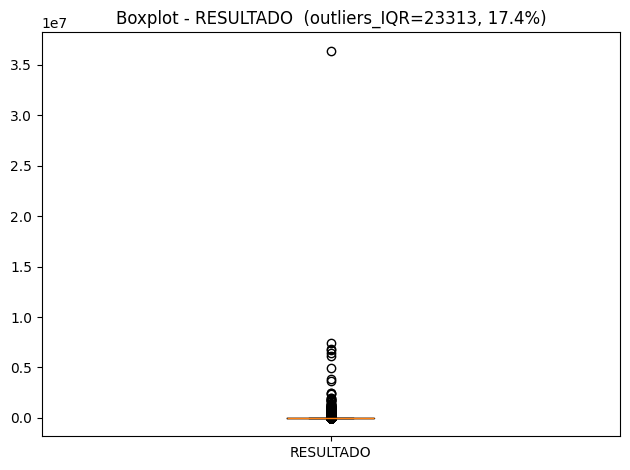

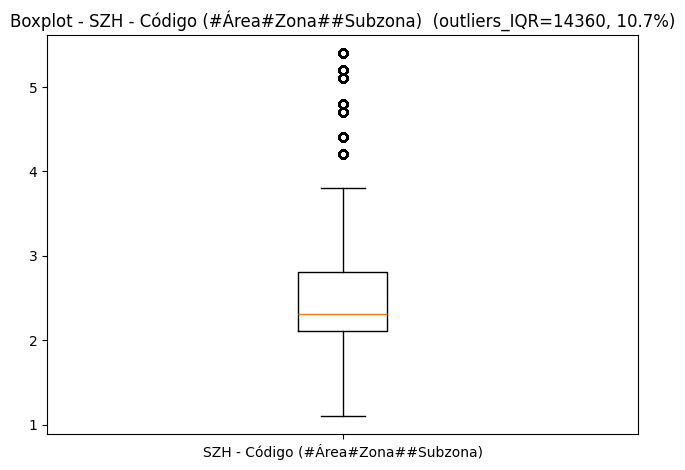

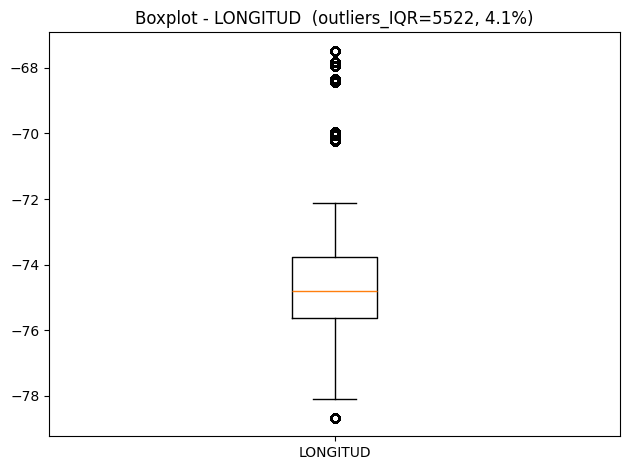

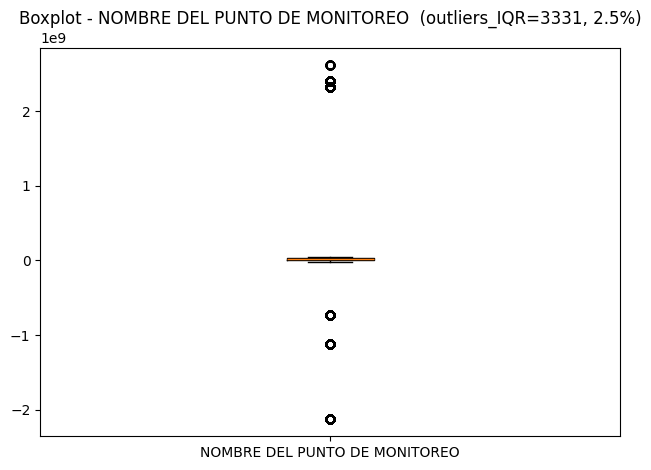

Sin graficar (mostrando hasta 20): ['LATITUD']


,columna,outliers_IQR,ratio
1,LATITUD,1468,0.010934


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Parámetros para NO explotar el notebook
TOP_K = 4                 # máximo de boxplots a mostrar
MIN_OUTLIER_RATIO = 0.01  # exige al menos 1% de outliers en la columna (ajusta o pon 0)

# Candidatas: columnas con outliers > 0
cand = out_df.copy()
if "columna" not in cand.columns:
    raise ValueError("out_df no tiene la columna 'columna' (revisa la celda de outliers).")

cand["ratio"] = cand["outliers_IQR"] / max(1, len(df_conv))
cand = cand[cand["outliers_IQR"] > 0]
cand = cand[cand["ratio"] >= MIN_OUTLIER_RATIO]
cand = cand.sort_values(["outliers_IQR","ratio"], ascending=[False, False])

cols_to_plot = cand["columna"].head(TOP_K).tolist()
print(f"Boxplots (máx {TOP_K}) para columnas con más outliers y ratio ≥ {MIN_OUTLIER_RATIO:.2%}:")
print(cols_to_plot)

for col in cols_to_plot:
    s = pd.to_numeric(df_conv[col], errors="coerce").dropna()
    if s.empty:
        continue
    plt.figure()
    plt.boxplot(s.values, vert=True)
    # título con métricas útiles
    row = cand[cand["columna"] == col].iloc[0]
    plt.title(f"Boxplot - {col}  (outliers_IQR={int(row.outliers_IQR)}, {row.ratio:.1%})")
    plt.xticks([1], [col])
    plt.tight_layout()
    plt.show()

# Resumen de las que no se graficaron
skipped = [c for c in cand["columna"].tolist() if c not in cols_to_plot]
if skipped:
    print(f"Sin graficar (mostrando hasta 20): {skipped[:20]}")
    display(cand.loc[cand["columna"].isin(skipped), ["columna","outliers_IQR","ratio"]].head(20))
else:
    print("No quedaron columnas sin graficar bajo estos criterios.")


Graficando 4 columnas: ['PROYECTO', 'ZONA HIDROGRÁFICA - ZH', 'PROPIEDAD OBSERVADA', 'UNIDAD DEL RESULTADO']


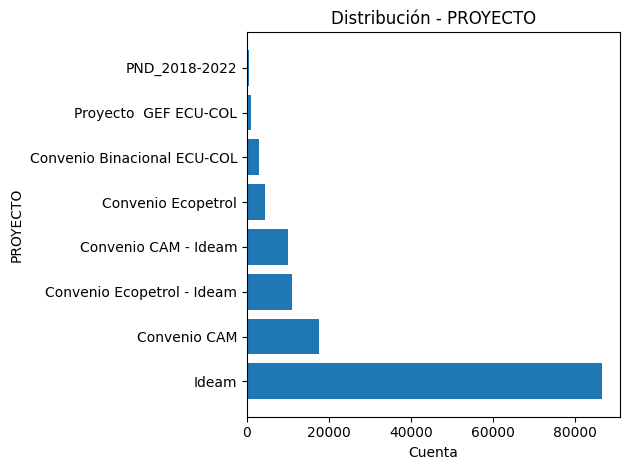

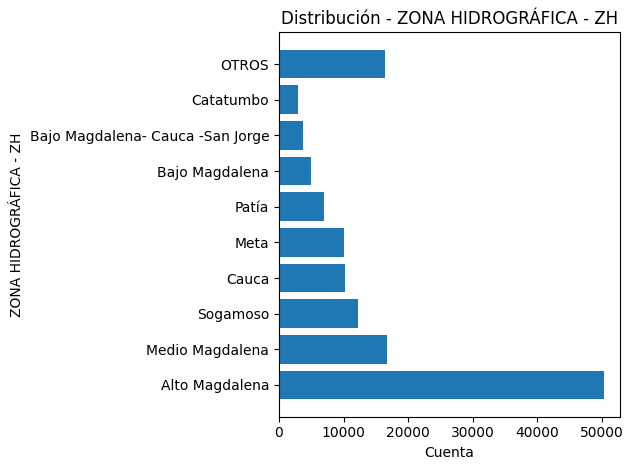

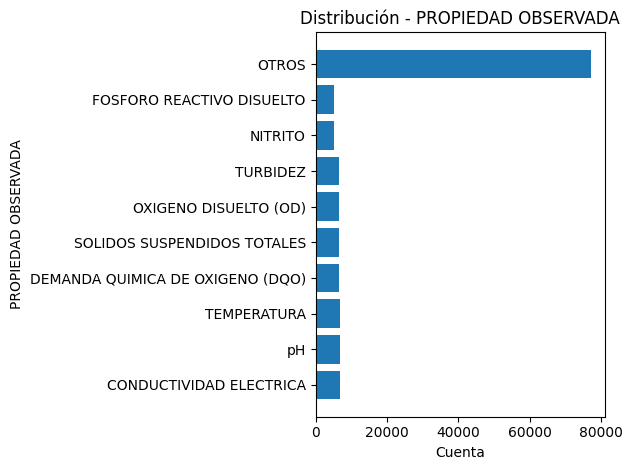

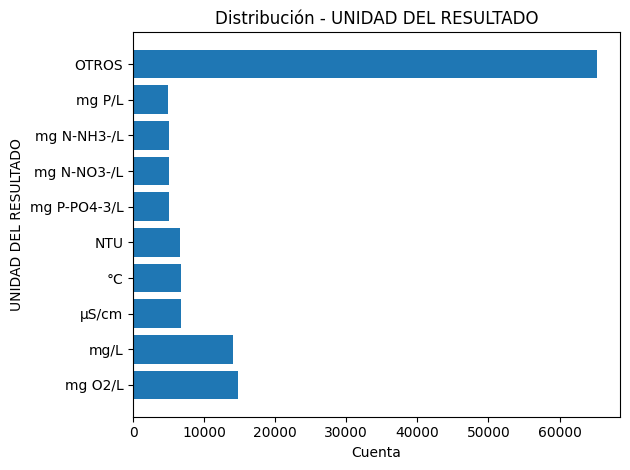

In [24]:
TARGET_PLOTS = 4
MAX_BARS     = 10
MIN_UNIQUE   = 2
MAX_UNIQUE   = 15

def _norm(s: str) -> str:
    return str(s).strip().upper().replace("__","_").replace("  "," ")

EXCLUDE_EXACT = {
    "DEPARTAMENTO_PRESTACION","MUNICIPIO_PRESTACION","SERVICIO",
    "DEPARTAMENTO_DOMICILIO","MUNICIPIO_DOMICILIO","DIRECCION","EMAIL",
    "TIPO_INSCRIPCION","REPRESENTANTE_LEGAL","TELEFONO",
}
EXCLUDE_PATTERNS = ("DEPARTAMENTO","MUNICIPIO","DIRECCION","EMAIL","TELEFONO")

all_cat = df.select_dtypes(exclude=[np.number]).columns.tolist()
cat_cols = []
for c in all_cat:
    cn = _norm(c)
    if cn in EXCLUDE_EXACT or any(p in cn for p in EXCLUDE_PATTERNS):
        continue
    cat_cols.append(c)

def entropy(series: pd.Series) -> float:
    p = series.value_counts(normalize=True, dropna=False).values
    p = p[p > 0]
    return float(-(p * np.log2(p)).sum()) if len(p) else 0.0

rank_rows = []
for c in cat_cols:
    s = df[c].astype(str).fillna("NULO")
    nunique = int(s.nunique(dropna=False))
    if MIN_UNIQUE <= nunique <= MAX_UNIQUE:
        rank_rows.append({"col": c, "n_unique": nunique, "entropy": entropy(s)})

rank_df = pd.DataFrame(rank_rows).sort_values(["entropy","n_unique"], ascending=[False, True])
chosen = rank_df["col"].tolist()[:TARGET_PLOTS]

if len(chosen) < TARGET_PLOTS:
    rest = []
    for c in cat_cols:
        if c in chosen:
            continue
        nunique = int(df[c].astype(str).fillna("NULO").nunique(dropna=False))
        if nunique >= 2:
            rest.append((c, nunique))
    rest_sorted = [c for c, _ in sorted(rest, key=lambda x: x[1])]
    for c in rest_sorted:
        if len(chosen) >= TARGET_PLOTS:
            break
        chosen.append(c)

print(f"Graficando {len(chosen)} columnas:", chosen)

for col in chosen:
    s = df[col].astype(str).fillna("NULO")
    vc = s.value_counts()
    if vc.empty:
        continue
    if len(vc) > MAX_BARS:
        top = vc.iloc[:MAX_BARS-1]
        otros = vc.iloc[MAX_BARS-1:].sum()
        vc_plot = pd.concat([top, pd.Series({"OTROS": otros})])
    else:
        vc_plot = vc

    y = range(len(vc_plot.index))
    plt.figure()
    plt.barh(y, vc_plot.values)
    plt.yticks(y, vc_plot.index)
    plt.title(f"Distribución - {col}")
    plt.xlabel("Cuenta"); plt.ylabel(col)
    plt.tight_layout()
    plt.show()

,NOMBRE DEL PUNTO DE MONITOREO,LATITUD,LONGITUD,ELEVACIÓN (m.s.n.m.),SZH - Código (#Área#Zona##Subzona),FECHA,RESULTADO,CODIGO__MUESTRA
NOMBRE DEL PUNTO DE MONITOREO,1.000000,0.005885,0.028598,0.010480,0.058816,0.087955,-0.002576,0.082900
LATITUD,0.005885,1.000000,0.345568,-0.256393,-0.385837,-0.127942,-0.003578,-0.130704
LONGITUD,0.028598,0.345568,1.000000,-0.233455,-0.190477,-0.057304,-0.006385,-0.054785
ELEVACIÓN (m.s.n.m.),0.010480,-0.256393,-0.233455,1.000000,-0.172784,-0.008064,0.000820,-0.003483
SZH - Código (#Área#Zona##Subzona),0.058816,-0.385837,-0.190477,-0.172784,1.000000,0.031222,-0.006905,0.036045
FECHA,0.087955,-0.127942,-0.057304,-0.008064,0.031222,1.000000,0.000838,0.983764
RESULTADO,-0.002576,-0.003578,-0.006385,0.000820,-0.006905,0.000838,1.000000,0.001424
CODIGO__MUESTRA,0.082900,-0.130704,-0.054785,-0.003483,0.036045,0.983764,0.001424,1.000000


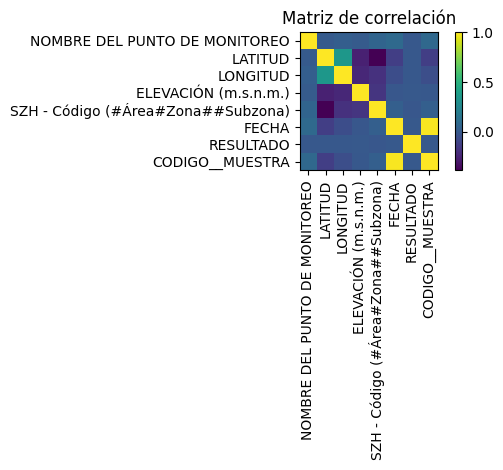

In [25]:
if len(num_cols) >= 2:
    corr_mat = df_conv[num_cols].corr()
    display(corr_mat)
    plt.figure()
    plt.imshow(corr_mat, interpolation='nearest')
    plt.title("Matriz de correlación")
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas numéricas para correlación.")

In [26]:
rows = []
for col in df.columns:
    s = df[col]
    rows.append({
        "columna": col,
        "tipo": str(s.dtype),
        "n": int(s.shape[0]),
        "nulos": int(s.isna().sum()),
        "pct_nulos": round(float(s.isna().mean()*100), 2),
        "unicos": int(s.nunique(dropna=True)),
        "es_numerica": bool(pd.api.types.is_numeric_dtype(s)),
    })
dq = pd.DataFrame(rows).sort_values(["pct_nulos","columna"], ascending=[False, True])
dq.head(20)

,columna,tipo,n,nulos,pct_nulos,unicos,es_numerica
15,CODIGO__MUESTRA,object,134261,0,0.0,6818,False
4,CORRIENTE,object,134261,0,0.0,120,False
8,DEPARTAMENTO,object,134261,0,0.0,28,False
3,ELEVACIÓN (m.s.n.m.),object,134261,0,0.0,216,False
10,FECHA,object,134261,0,0.0,3190,False
1,LATITUD,float64,134261,0,0.0,241,True
2,LONGITUD,float64,134261,0,0.0,243,True
9,MUNICIPIO,object,134261,0,0.0,170,False
0,NOMBRE DEL PUNTO DE MONITOREO,object,134261,0,0.0,243,False
7,Nombre Subzona Hidrográfica,object,134261,0,0.0,107,False
